<a href="https://colab.research.google.com/github/bharath1659/Thota_IT533/blob/main/clusteringdogdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets # This is where the iris dataset will come from later
from sklearn.cluster import KMeans

# First, we import our dog dataset

dog_data = pd.read_csv('https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/dogs.csv')
dog_data = dog_data.set_index('breed')
dog_data

,height (inches),weight (pounds)
breed,,
Border Collie,20,45
Boston Terrier,16,20
Brittany Spaniel,18,35
Bullmastiff,27,120
Chihuahua,8,8
German Shepherd,25,78
Golden Retriever,23,70
Great Dane,32,160
Portuguese Water Dog,21,50


In [2]:
# # Mean Normalization with StandardScaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
dog_data_array = sc.fit_transform(dog_data.values) #calculate μ & σ (fit) and apply the transformation(transform)
dog_data_array

array([[ 0.06223799, -0.33050712],
       [-0.48545628, -0.88811116],
       [-0.21160915, -0.55354874],
       [ 1.02070295,  1.34230499],
       [-1.58084482, -1.1557611 ],
       [ 0.74685582,  0.40553021],
       [ 0.47300869,  0.22709692],
       [ 1.70532079,  2.23447145],
       [ 0.19916155, -0.21898631],
       [-0.07468558,  0.11557611],
       [-1.85469195, -1.17806526]])

In [3]:
# Assign the scaled data to a DataFrame & use the index and columns arguments to keep your original indices and column names:
dog_data_norm = pd.DataFrame(dog_data_array, index=dog_data.index, columns=dog_data.columns)
dog_data_norm

,height (inches),weight (pounds)
breed,,
Border Collie,0.062238,-0.330507
Boston Terrier,-0.485456,-0.888111
Brittany Spaniel,-0.211609,-0.553549
Bullmastiff,1.020703,1.342305
Chihuahua,-1.580845,-1.155761
German Shepherd,0.746856,0.405530
Golden Retriever,0.473009,0.227097
Great Dane,1.705321,2.234471
Portuguese Water Dog,0.199162,-0.218986


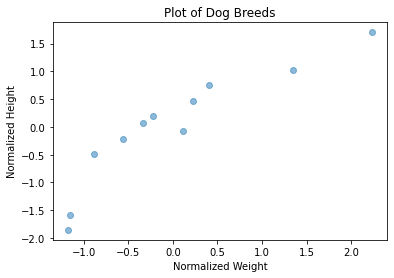

In [4]:
# Let's build a simple scatter plot
plt.scatter(dog_data_norm['weight (pounds)'], dog_data_norm['height (inches)'], alpha=0.5)
plt.title('Plot of Dog Breeds')
plt.xlabel('Normalized Weight')
plt.ylabel('Normalized Height')
plt.show()    

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, ).fit(dog_data_norm)
labels = kmeans.labels_
labels

array([1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2], dtype=int32)

In [16]:
groups = {0: [], 1: [], 2: [], 3: []} # We have 3 clusters
i = 0                                       # Initializing the row counter
for index, row in dog_data.iterrows():      # We are now going through each row in dog_data
    groups[labels[i]].append(index)         # and appending the cluster labels/ numbers to each index
    i += 1

## Now we make a pretty list:

for key, value in groups.items():           # the key is the cluster number and the value is the names of the dogs
    print ('CLUSTER %i' % key)
    for breed in value:
        print("    %s" % breed)
    print('\n')


CLUSTER 0
    Bullmastiff
    Great Dane




NameError: ignored

In [7]:
iris = datasets.load_iris() 
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [8]:
iris_data = pd.DataFrame(iris.data, columns=iris['feature_names'])
iris_target = pd.DataFrame(iris.target, columns=['target'])

k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9


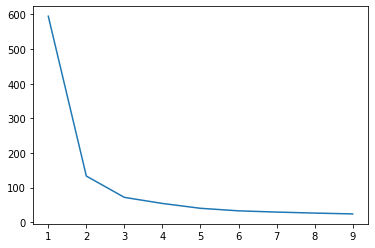

In [9]:
# Elbow method

def elbow_plot(data, maxK=10, seed_centroids=None):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
        - seed_centroids (default = None ): float (initial value of centroids for k-means)
    """
    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data)
            data["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
            data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return

elbow_plot(iris_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']], maxK=10)

In [14]:
import plotly.figure_factory as ffg
fig = ffg.create_dendrogram(iris_data, labels=iris_data.index)
fig.update_layout(width=800, height=500)
fig.show()

In [15]:
import plotly.figure_factory as ff
fig = ff.create_dendrogram(dog_data, labels=dog_data.index)
fig.update_layout(width=600, height=400)
fig.show()

NameError: ignored